In [ ]:
#!pip uninstall scikit-learn
!pip install scikit-learn==0.24.2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import r2_score

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [22]:
df_train = pd.read_csv(r"C:\Users\User\Desktop\codes_data\Train Data Carb.csv")
df_train.head()

,MD,GR,PEFZ,SP,S-sonic,SEXP,SESP,RT,RHOB,New_feat,New_feat2,New_feat3,NPHI,PHITCPX,K,SW,T2LM_L
0,1756.562,27.64,7.37,-412.38,123.43,10.7475,78.3657,108.2183,2.4458,1.269370,0.333298,7.773877,0.0358,0.0992,9.31,0.5190,122.91400
1,1747.418,32.46,6.77,-424.69,149.03,7.2472,111.9623,128.2477,2.2552,0.062469,1.049670,31.360640,0.0981,0.2801,10.70,0.0277,499.09260
2,1950.720,31.04,7.57,-334.81,161.29,0.8564,5.8217,5.3824,2.2780,0.256275,6.784122,1.740688,0.1362,0.2990,49.81,0.1125,60.21747
3,1940.052,37.18,6.12,-337.25,134.08,5.3996,18.0115,19.4655,2.5448,1.364522,0.022260,3.915700,0.1113,0.2174,0.20,0.5362,84.08492
4,1765.249,30.73,7.25,-413.81,134.00,6.5137,98.0988,167.9960,2.4636,1.638540,0.279549,14.557862,0.1047,0.1484,2.67,0.6651,129.75230


In [23]:
df_test = pd.read_csv(r"C:\Users\User\Desktop\codes_data\Test Data Carb.csv")
df_test.head()

,MD,GR,PEFZ,SP,S-sonic,SEXP,SESP,RT,RHOB,New_feat,New_feat2,New_feat3,NPHI,PHITCPX,K,SW,T2LM_L
0,1909.724,41.96,6.42,-363.13,148.96,3.1383,8.2482,7.5727,2.5097,2.104634,1.372072,1.214135,0.1336,0.1472,10.27,0.8386,73.434000
1,1786.433,36.24,7.01,-403.88,159.32,2.0840,336.5056,657.0143,2.2738,0.273766,12.881616,116.329986,0.1574,0.3457,81.84,0.1204,739.379100
2,1751.076,31.19,7.23,-419.25,144.80,5.1604,160.6909,393.2737,2.2351,0.808883,0.404910,41.136870,0.0990,0.2560,4.09,0.3619,340.794200
3,1696.822,36.82,5.71,-406.25,192.71,23.3661,4986.6070,28475.5300,1.8283,0.000000,63.295900,2761.582957,0.0925,0.5538,684.28,0.0000,233.766500
4,1680.820,96.54,5.34,-394.63,274.52,2.0760,1.7166,1.7492,2.4744,2.279417,0.002958,0.318086,0.2958,0.1853,0.01,0.9212,7.627165


In [24]:
#set MD as index
df_train = df_train.set_index('MD')
df_train.head()

,GR,PEFZ,SP,S-sonic,SEXP,SESP,RT,RHOB,New_feat,New_feat2,New_feat3,NPHI,PHITCPX,K,SW,T2LM_L
MD,,,,,,,,,,,,,,,,
1756.562,27.64,7.37,-412.38,123.43,10.7475,78.3657,108.2183,2.4458,1.269370,0.333298,7.773877,0.0358,0.0992,9.31,0.5190,122.91400
1747.418,32.46,6.77,-424.69,149.03,7.2472,111.9623,128.2477,2.2552,0.062469,1.049670,31.360640,0.0981,0.2801,10.70,0.0277,499.09260
1950.720,31.04,7.57,-334.81,161.29,0.8564,5.8217,5.3824,2.2780,0.256275,6.784122,1.740688,0.1362,0.2990,49.81,0.1125,60.21747
1940.052,37.18,6.12,-337.25,134.08,5.3996,18.0115,19.4655,2.5448,1.364522,0.022260,3.915700,0.1113,0.2174,0.20,0.5362,84.08492
1765.249,30.73,7.25,-413.81,134.00,6.5137,98.0988,167.9960,2.4636,1.638540,0.279549,14.557862,0.1047,0.1484,2.67,0.6651,129.75230


In [25]:
# create the inputs and outputs for train data
X_train = df_train.drop(['T2LM_L', 'New_feat', 'New_feat2', 'New_feat3'], 1) #Feature Matrix
y_train = df_train[['T2LM_L']]

In [26]:
#set MD as index
df_test = df_test.set_index('MD')
df_test.head()

,GR,PEFZ,SP,S-sonic,SEXP,SESP,RT,RHOB,New_feat,New_feat2,New_feat3,NPHI,PHITCPX,K,SW,T2LM_L
MD,,,,,,,,,,,,,,,,
1909.724,41.96,6.42,-363.13,148.96,3.1383,8.2482,7.5727,2.5097,2.104634,1.372072,1.214135,0.1336,0.1472,10.27,0.8386,73.434000
1786.433,36.24,7.01,-403.88,159.32,2.0840,336.5056,657.0143,2.2738,0.273766,12.881616,116.329986,0.1574,0.3457,81.84,0.1204,739.379100
1751.076,31.19,7.23,-419.25,144.80,5.1604,160.6909,393.2737,2.2351,0.808883,0.404910,41.136870,0.0990,0.2560,4.09,0.3619,340.794200
1696.822,36.82,5.71,-406.25,192.71,23.3661,4986.6070,28475.5300,1.8283,0.000000,63.295900,2761.582957,0.0925,0.5538,684.28,0.0000,233.766500
1680.820,96.54,5.34,-394.63,274.52,2.0760,1.7166,1.7492,2.4744,2.279417,0.002958,0.318086,0.2958,0.1853,0.01,0.9212,7.627165


In [27]:
# create the inputs and outputs for test data
X_test = df_test.drop(['T2LM_L', 'New_feat', 'New_feat2', 'New_feat3'], 1) #Feature Matrix
y_test = df_test[['T2LM_L']]

In [28]:
# XGBoost Regressor
model = ExtraTreesRegressor()

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Accuracy of train data: 1.0
Accuracy of test data: 0.8572254224143692
Mean Absolute Error: 58.13862355749347
Mean Squared Error: 7905.360366034674
Root Mean Squared Error: 88.9120934745925
MAPE 0.479
MPD 28.398


In [29]:
# create the inputs and outputs for train data
X_train = df_train.drop(['T2LM_L', 'New_feat2', 'New_feat3'], 1) #Feature Matrix
y_train = df_train[['T2LM_L']]

In [30]:
# create the inputs and outputs for test data
X_test = df_test.drop(['T2LM_L', 'New_feat2', 'New_feat3'], 1) #Feature Matrix
y_test = df_test[['T2LM_L']]

In [31]:
# XGBoost Regressor
model = ExtraTreesRegressor()

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Accuracy of train data: 1.0
Accuracy of test data: 0.8596018150552432
Mean Absolute Error: 57.80276931054831
Mean Squared Error: 7773.780637241329
Root Mean Squared Error: 88.16904579976654
MAPE 0.476
MPD 27.814


## Bayesian optimisation does not run with scikit-learn version 0.24.1. Also, version 0.23.1 does not work calculate MAPE and MPD

In [32]:
#!pip install scikit-optimize
from skopt import gp_minimize
from skopt import BayesSearchCV
from skopt.space import Integer, Real

In [33]:
search_space = {'n_estimators': Integer(1, 1000),
               'max_depth': Integer(1, 1000),
              'n_jobs': Integer(1, 500)}
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

bayes_search = BayesSearchCV(model, search_space, cv=3, n_jobs=-1, verbose=1, n_iter=20, random_state=0)

In [34]:
bayes_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=20, n_jobs=-1,
              random_state=0,
              search_spaces={'max_depth': Integer(low=1, high=1000, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=1000, prior='uniform', transform='normalize'),
                             'n_jobs': Integer(low=1, high=500, prior='uniform', transform='normalize')},
              verbose=1)

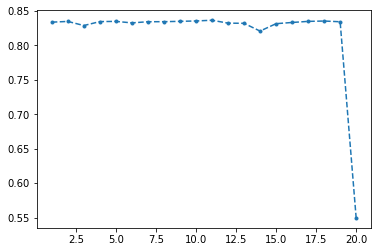

In [35]:
plt.plot(range(1,21), bayes_search.cv_results_['mean_test_score'], '.--')
plt.show()

In [36]:
bayes_search.best_score_

0.8362887073252385

In [37]:
bayes_search.best_params_

OrderedDict([('max_depth', 999), ('n_estimators', 333), ('n_jobs', 360)])

In [38]:
# Bayes

model = bayes_search.best_estimator_

model.fit(X_train, y_train)

# evaluate the model
pred = model.predict(X_test)

# Print the name and gini importance of each feature
for feature in zip(X_train.columns, model.feature_importances_):
    print(feature)

('GR', 0.028350958854978216)
('PEFZ', 0.03249067110649645)
('SP', 0.026653305399451665)
('S-sonic', 0.022863019294916295)
('SEXP', 0.055397863100958594)
('SESP', 0.026623426988544502)
('RT', 0.026576000850396107)
('RHOB', 0.06396447940897874)
('New_feat', 0.2192073632900388)
('NPHI', 0.06220452893524121)
('PHITCPX', 0.09316856575047366)
('K', 0.1447756825996091)
('SW', 0.19772413441991657)


In [39]:
# Evaluate model predictions

model_score_train = model.score(X_train, y_train)
model_score_test = model.score(X_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)
print('MAPE %.3f' % (metrics.mean_absolute_percentage_error(y_test, pred)))
print('MPD %.3f' % (metrics.mean_tweedie_deviance(y_test, pred, power=1)))

Accuracy of train data: 1.0
Accuracy of test data: 0.8581427809471542
Mean Absolute Error: 57.89925961766993
Mean Squared Error: 7854.566660956657
Root Mean Squared Error: 88.62599314510759
MAPE 0.478
MPD 28.219
